In [3]:
import statsmodels.api as sm
import pandas as pd

In [4]:
df = pd.read_excel('../Data_RLMS.xlsx')
df.head()

,idind,psu,status,age,male,industry,lnwage,public,internet,children,...,id66,id67,id68,id69,id70,id71,id72,id73,id74,id75
0,37,Волосовский,ПГТ,59,1,"НАУКА, КУЛЬТ",8.954980,0,1,2,...,0,0,0,0,0,0,0,0,1,0
1,122,Волосовский,Село,40,0,ОБРАЗОВАНИЕ,10.628960,1,1,1,...,1,0,0,0,1,0,0,0,1,0
2,125,Волосовский,Село,53,0,СЕЛЬСКОЕ ХОЗ,10.341270,0,1,3,...,0,0,0,0,0,0,0,0,0,1
3,126,Волосовский,Село,47,1,СЕЛЬСКОЕ ХОЗ,9.753487,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,132,Волосовский,Село,54,0,ЗДРАВООХРАНЕ,10.158950,1,1,1,...,1,0,0,0,0,0,0,0,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3871 entries, 0 to 3870
Data columns (total 87 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   idind     3871 non-null   int64  
 1   psu       3871 non-null   object 
 2   status    3871 non-null   object 
 3   age       3871 non-null   int64  
 4   male      3871 non-null   int64  
 5   industry  3871 non-null   object 
 6   lnwage    3871 non-null   float64
 7   public    3871 non-null   int64  
 8   internet  3871 non-null   int64  
 9   children  3871 non-null   int64  
 10  urban     3871 non-null   int64  
 11  educ      3871 non-null   int64  
 12  id1       3871 non-null   int64  
 13  id2       3871 non-null   int64  
 14  id3       3871 non-null   int64  
 15  id4       3871 non-null   int64  
 16  id5       3871 non-null   int64  
 17  id6       3871 non-null   int64  
 18  id7       3871 non-null   int64  
 19  id8       3871 non-null   int64  
 20  id9       3871 non-null   int6

In [6]:
df.status.value_counts()

status
Областной це    1645
Город           1145
Село             862
ПГТ              219
Name: count, dtype: int64

In [7]:
df.industry.value_counts()

industry
ТОРГОВЛЯ, БЫ    800
ОБРАЗОВАНИЕ     411
ТРАНСПОРТ, С    361
ЗДРАВООХРАНЕ    306
СТРОИТЕЛЬСТВ    269
ЛЕГКАЯ, ПИЩЕ    248
АРМИЯ, МВД,     211
СЕЛЬСКОЕ ХОЗ    151
ЖИЛИЩНО-КОММ    140
НЕФТЕГАЗОВАЯ    130
НАУКА, КУЛЬТ    104
ОРГАНЫ УПРАВ    100
ФИНАНСЫ          96
ДРУГАЯ ОТРАС     90
ГРАЖДАНСКОЕ      89
ВОЕННО-ПРОМЫ     83
ЭНЕРГЕТИЧЕСК     78
СОЦИАЛЬНОЕ О     27
ЮРИСПРУДЕНЦИ     25
ХИМИЧЕСКАЯ П     21
ДЕРЕВООБРАБА     20
СПОРТ, ТУРИЗ     20
УСЛУГИ НАСЕЛ     20
IT, ИНФОРМАЦ     19
ОПЕРАЦИИ С Н     13
СМИ, ИЗДАТЕЛ     12
РЕКЛАМА, МАР     11
ОРГАНИЗАЦИЯ       6
ЭКОЛОГИЯ, ЗА      6
ОБЩЕСТВЕННЫЕ      2
ЦЕРКОВЬ           2
Name: count, dtype: int64

In [8]:
df = df.rename(
    {
        "psu": "region",
        "status": "city_type",
        "male": "is_male",
        "lnwage": "log_wage",
        "public": "is_gov",
        "children": "num_children",
        "educ": "education_level",
        "urban": "is_urban",
    },
    axis=1,
)

In [9]:
df[df.internet == 0].city_type.value_counts()

city_type
Село            207
Город           187
Областной це    158
ПГТ              33
Name: count, dtype: int64

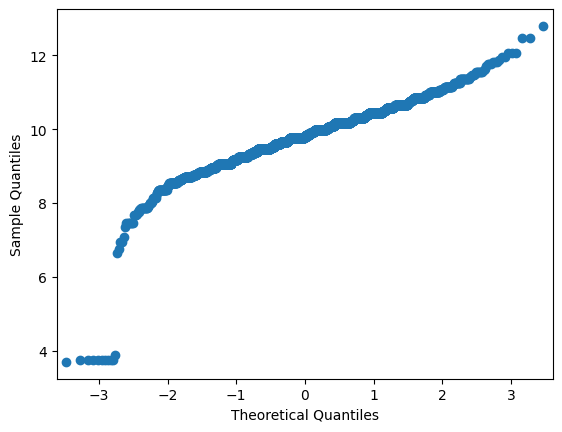

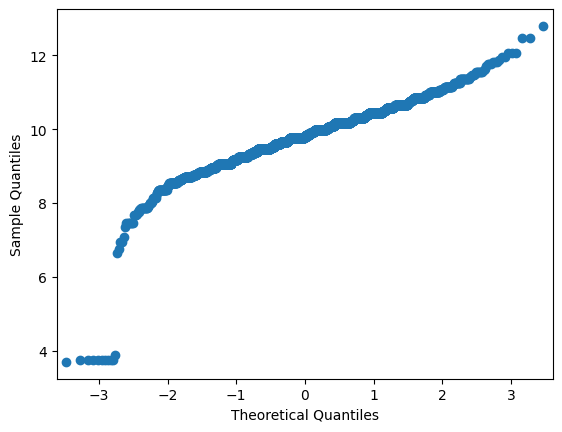

In [12]:
sm.qqplot(df.log_wage)